<a href="https://colab.research.google.com/github/ludeon852/Talentotech/blob/main/limpieza_de_datosultimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:
\

In [5]:
from google.colab import drive

In [70]:
#sesion 14
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import openpyxl as xl

In [71]:
print("Lectura de archivo csv")
from google.colab import drive
drive.mount('/content/drive')
#ruta ="/content/drive/MyDrive/Colab Notebooks/dataset_banco1.xlsx"
#data = xl.load_workbook('ruta')

ruta ="/content/drive/MyDrive/Colab Notebooks/dataset_banco (1).csv"
data = pd.read_csv(ruta)

Lectura de archivo csv
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [ ]:
#visualizar las variables categoricas y numericas
print("Variables categoricas y numercias")
data.info()


Variables categoricas y numercias
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45207 entries, 0 to 45206
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45206 non-null  object 
 3   education  45206 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45205 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45206 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45206 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [ ]:
#Se eliminan los datos faltantes, al ser tan pocos los datos non-null se aplica inplace=true
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45201 entries, 0 to 45206
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45201 non-null  int64  
 1   job        45201 non-null  object 
 2   marital    45201 non-null  object 
 3   education  45201 non-null  object 
 4   default    45201 non-null  object 
 5   balance    45201 non-null  float64
 6   housing    45201 non-null  object 
 7   loan       45201 non-null  object 
 8   contact    45201 non-null  object 
 9   day        45201 non-null  int64  
 10  month      45201 non-null  object 
 11  duration   45201 non-null  float64
 12  campaign   45201 non-null  int64  
 13  pdays      45201 non-null  float64
 14  previous   45201 non-null  int64  
 15  poutcome   45201 non-null  object 
 16  y          45201 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


Notas acerca de ciclo FOR

for col in cols_cat:: Este es un bucle for que itera sobre cada elemento en la lista cols_cat. La variable col tomará el valor de cada elemento en cada iteración del bucle.

print(f'Columna {col}: {data[col].nunique()} subniveles'): Dentro del bucle, esta línea de código imprime un mensaje que indica el nombre de la columna (col), seguido por el número de subniveles únicos en esa columna.

f'Columna {col}: {data[col].nunique()} subniveles': Esta es una cadena de formato (f-string) que contiene dos variables:
{col}: Representa el nombre de la columna actual en la iteración del bucle.
{data[col].nunique()}: Representa el número de subniveles únicos en la columna actual. data[col] selecciona la columna actual del DataFrame y .nunique() calcula el número de valores únicos en esa columna.
\

In [ ]:
#Conteo de los niveles en las diferentes columnas categoricas (col:representa el nombre de la columna actual, data col nunique: numero de sub niveles
#de la columna actual, data col selecciona la columna actual del dataframe y nunique calcula el numero de valores unicos en esa columna )
cols_cat = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']
for col in cols_cat:
    print(f'Columna{col}:{data[col].nunique()} subniveles')# para contar filas repetidas

Columnajob:5 subniveles
Columnamarital:4 subniveles
Columnaeducation:5 subniveles
Columnadefault:2 subniveles
Columnahousing:2 subniveles
Columnaloan:2 subniveles
Columnacontact:5 subniveles
Columnamonth:12 subniveles
Columnapoutcome:5 subniveles
Columnay:2 subniveles


In [ ]:
#Filas repetidas
print(f'Tamaño del set antes de eliminar las filas repetidas:{data.shape}')#elmina las filas repetidas y muestra un antes y un despues
data.drop_duplicates(inplace=True)
print(f'Tamaño del set despues de eliminar las filas repetidas:{data.shape}')


Tamaño del set antes de eliminar las filas repetidas:(45201, 17)
Tamaño del set despues de eliminar las filas repetidas:(45197, 17)


In [ ]:
#Calcula la media del atributo "pdays: dias de contacto al usuario antes de la campaña actual"
media = data['pdays'].mean()
print("Promedio de dias de contacto", media)

Promedio de dias de contacto 40.185078655662984


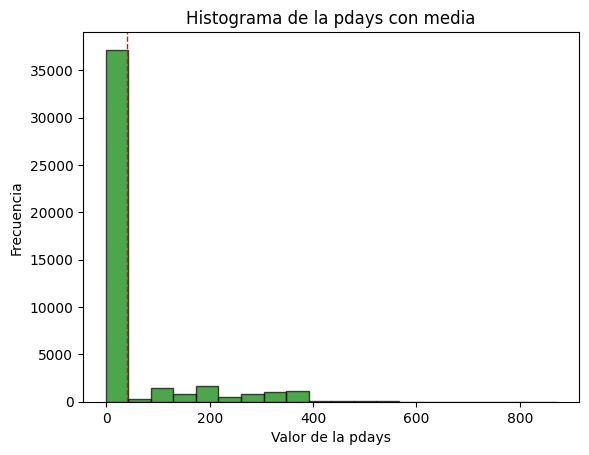

In [ ]:
#Graficar un histograma del atributo "campaña"
plt.hist(data['pdays'], bins=20, color='green', edgecolor='black',alpha=0.7)
#Agregar una linea vertical para mostrar la media
plt.axvline(media, color='red',linestyle='dashed',linewidth=1)
#Etiquietas y titulo
plt.xlabel('Valor de la pdays')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con media')
plt.show()#muestra la grafia


In [ ]:
#Calcual la desviacion estandar del atributo pdays
desviacion_estandar = data['pdays'].std()
print("desviacion_estandar de la pdays",desviacion_estandar)

desviacion_estandar de la pdays 100.11526444241578


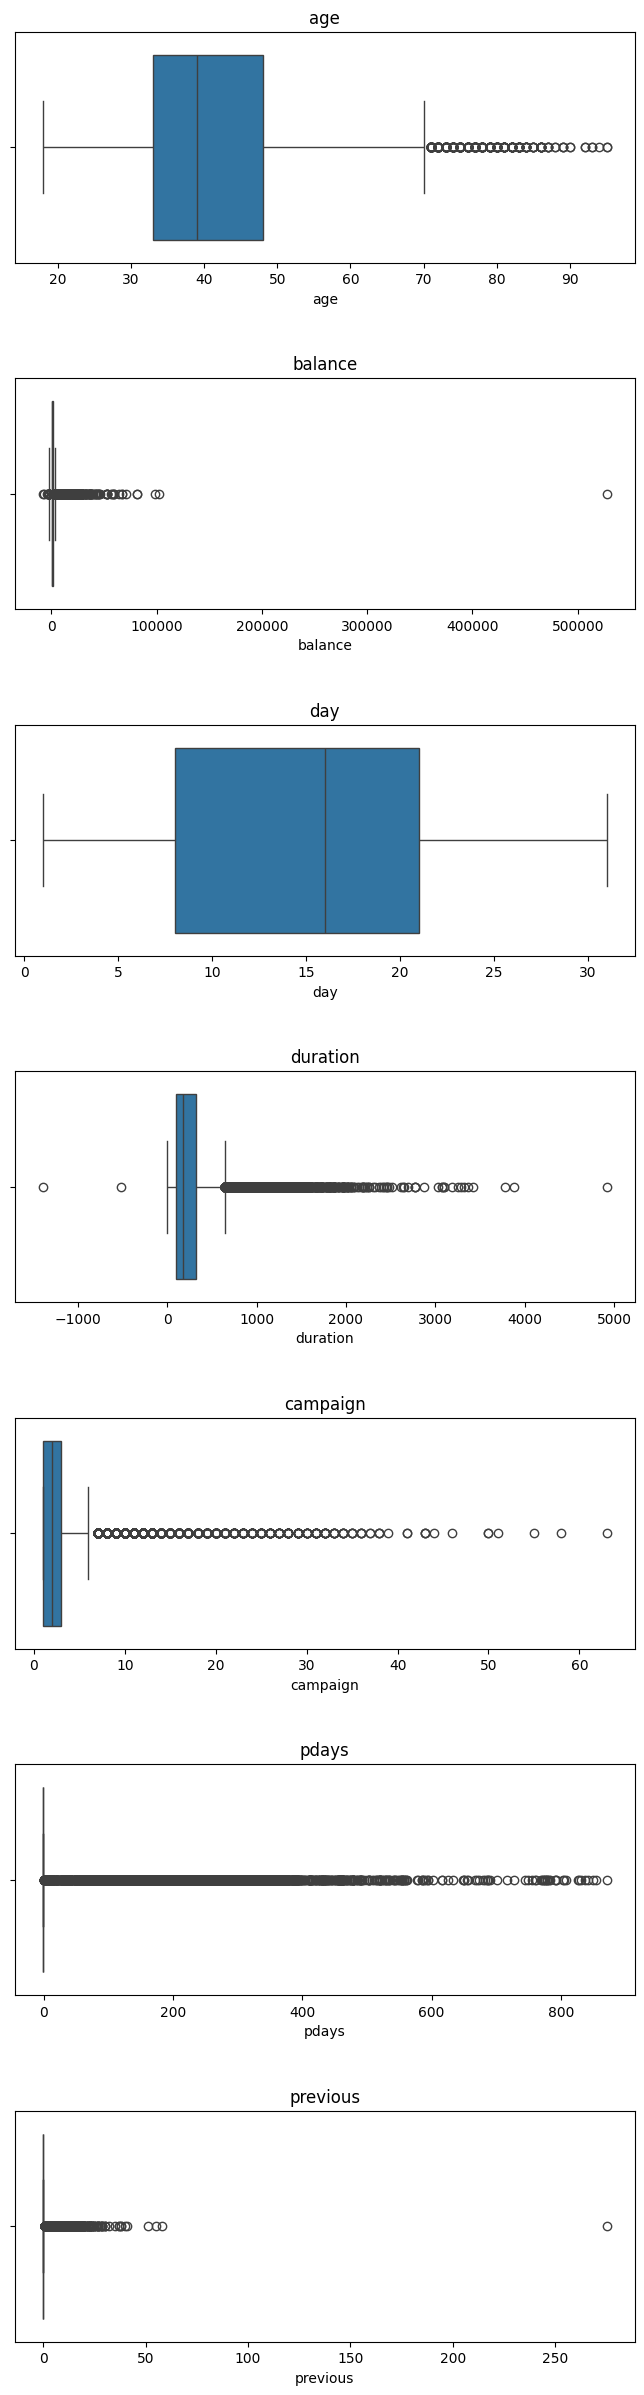

In [ ]:
#Generar graficas individuales para las variables numericas
# al estar en rangos diferentes

cols_num = ['age', 'balance' ,'day' ,'duration' ,'campaign' ,'pdays' ,'previous']
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

In [ ]:
#Creacion de dataframe

Data1 = {'id': ['1','2','3','4','5'],
        'weight': ['','134.6','122.3','144.5','122.5'],
        'height': ['1.70','','1.80','1.76','1.70'],
        'age':['50','24','36','61',''],
        'gender':['','F','F','M','F']}

df_2= pd.DataFrame(Data1)
print(df_2)

  id weight height age gender
0  1          1.70  50       
1  2  134.6         24      F
2  3  122.3   1.80  36      F
3  4  144.5   1.76  61      M
4  5  122.5   1.70          F


In [ ]:
#limpieza de columnas null

print(f'Cantidad de datos en la fila:{data.shape}')
df2 = df2.drop(df2[df2['id','weight','age','gender'] == null].index )
print(f'Cantidad de datos despues de eliminar datos:{data.shape}')

Cantidad de datos en la fila:(45197, 17)


NameError: name 'df2' is not defined

In [ ]:
# elminacion de datos data frame original, age > 100
print(f'Cantidad de datos en la fila:{data.shape}')
data = data.drop(data[data['age'] > 100].index)
print(f'Cantidad de datos despues de eliminar datos:{data.shape}')




Cantidad de datos en la fila:(45197, 17)
Cantidad de datos despues de eliminar datos:(45197, 17)


<ipython-input-20-5fce1cc31fd6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-20-5fce1cc31fd6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-20-5fce1cc31fd6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-20-5fce1cc31fd6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-20-5fce1cc31fd6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-20-5fce1cc31fd6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i]

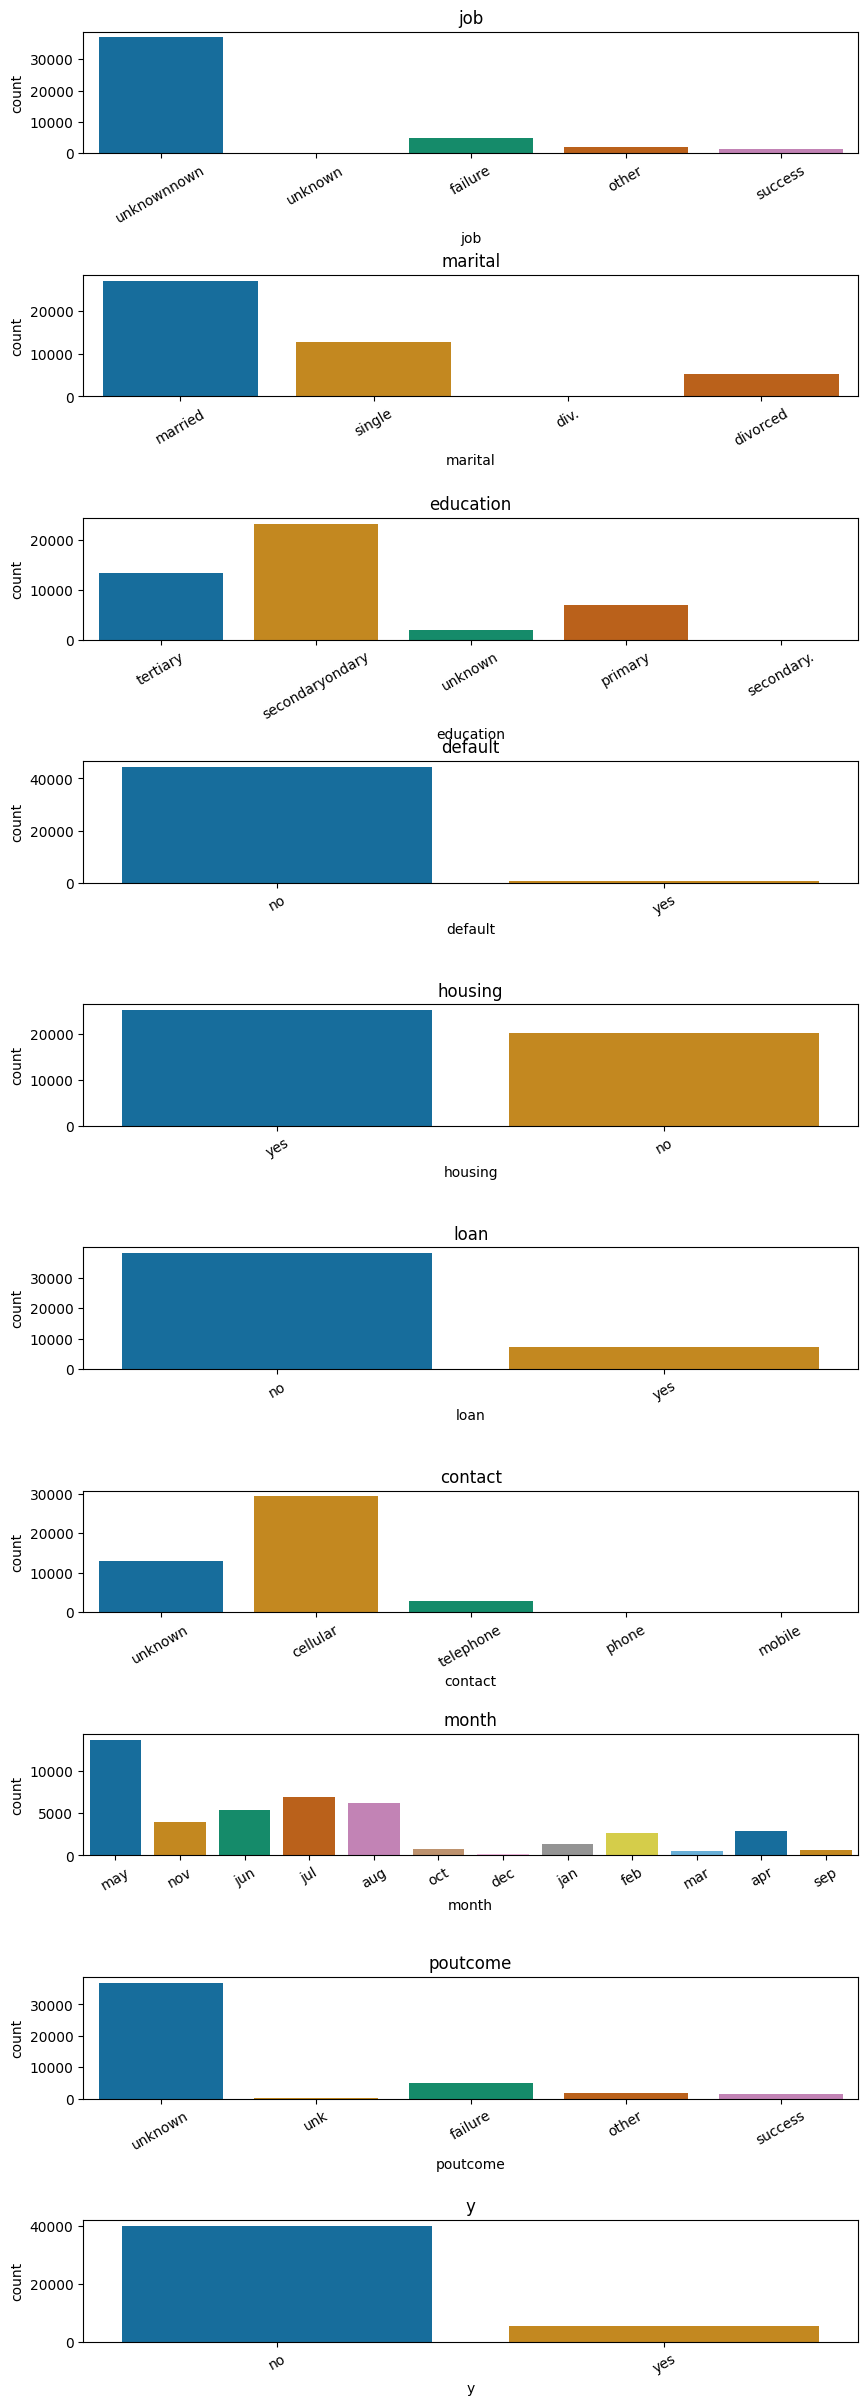

In [ ]:
#grafico de subniveles de cada variable categorica
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for column in cols_cat:
    #representar en minusculas solo si la columna es categorica
    data[column] = data[column].str.lower()# se agrupan las minusculas y se disminuyen los cuadros
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot (x=col, hue=col, data=data, ax=ax[i], palette = 'colorblind', legend=False)# se agregacolor a las barras
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)







In [ ]:
#Se rectifican los hjerrores tipograficos
#job: unificar admin. y administrative
print(data['job'].unique())
data['job'] = data['job'].str.replace('admin','administrative', regex=False)#reemplaza jen la columna job admin por adminisrative
print (data['job'].unique())

['unknownnown' 'unknown' 'failure' 'other' 'success']
['unknownnown' 'unknown' 'failure' 'other' 'success']


In [ ]:
#marital: unificar div. por divorced
print(data['marital'].unique())#antes
data['job'] = data['marital'].str.replace('div','divorced', regex=False)#reemplaza jen la columna job admin por adminisrative
print (data['marital'].unique())#despues

['married' 'single' 'div.' 'divorced']
['married' 'single' 'div.' 'divorced']


In [ ]:
#education: sec y secundary, unk por unknown
print(data['education'].unique())
data['education'] = data['education'].str.replace('sec','secondary', regex=False)
data.loc[data['education']=='unk','education']='unknown'
print (data['education'].unique())

['tertiary' 'secondaryondary' 'unknown' 'primary' 'secondary.']
['tertiary' 'secondaryondaryondary' 'unknown' 'primary' 'secondaryondary.']


In [ ]:
#contact: unificar telephone. por phone
print(data['contact'].unique())#antes
data['job'] = data['contact'].str.replace('telephone','phone', regex=False)
print (data['contact'].unique())#despues

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone' 'phone' 'mobile']


In [ ]:
#poutcome: unificar unk. por unknown
print(data['poutcome'].unique())#antes
data['job'] = data['poutcome'].str.replace('unk','unknown', regex=False)
print (data['poutcome'].unique())#despues

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'unk' 'failure' 'other' 'success']


In [ ]:
ruta = "/content/drive/MyDrive/Colab Notebooks/dataset_banco.csv"
data.to_csv(ruta,index=False)

Responde a las siguientes preguntas de negocio

1-¿Cuál es la edad promedio de los clientes interesados en adquirir un certificado de depósito?

Respuesta: La edad promedio de los clientes interesados esta entre de 41 y 42 años

2-En una gráfica, establece la diferencia de ingresos entre clientes interesados y no interesados en el certificado de depósito.
3-En un gráfico de barras, establece la distribución de género\ entre clientes interesados en el certificado de depósito.
4-¿Cuál es el nivel educativo predominante entre clientes interesados en el certificado de depósito?
5-¿Cuál es la relación entre estado civil vs el interés en adquirir el certificado de depósito?
6-¿Cuál es la distribución del medio de contacto más frecuente de los clientes interesados en adquirir el certificado de depósito?
En un gráfico de barras horizontales responde, ¿Cuál es el tipo de ocupación de los clientes interesados en adquirir el certificado de depósito?
¿Cuál es la frecuencia de contacto con los clientes interesados antes de la conversión?
¿Cuál es el patrón temporal en los contactos que conducen a una mayor conversión de clientes?


In [ ]:
#Taller
#edad promedio clientes interesados en adquirir certificado de deposito
edad_promedio_interesados = data[data['y'] == 'yes']['age'].mean()
print("1. edad promedio de los clientes interesados.", edad_promedio_interesados)

1. edad promedio de los clientes interesados. 41.664270853035745


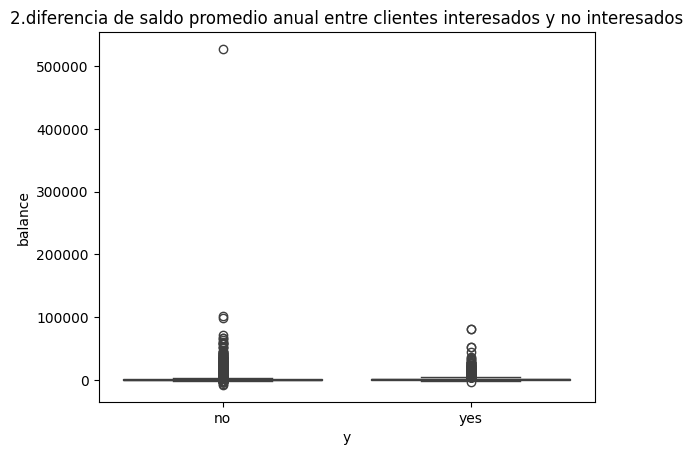

In [123]:
#diferencia de ingresos entre clientes interesados y no interesados
sns.boxplot(x='y', y='balance', data=data)
plt.title('2.diferencia de saldo promedio anual entre clientes interesados y no interesados')
plt.show()



In [4]:
import openpyxL as xl
data = xl.load_workbook('dataset_banco1.xlsx')


ModuleNotFoundError: No module named 'openpyxL'

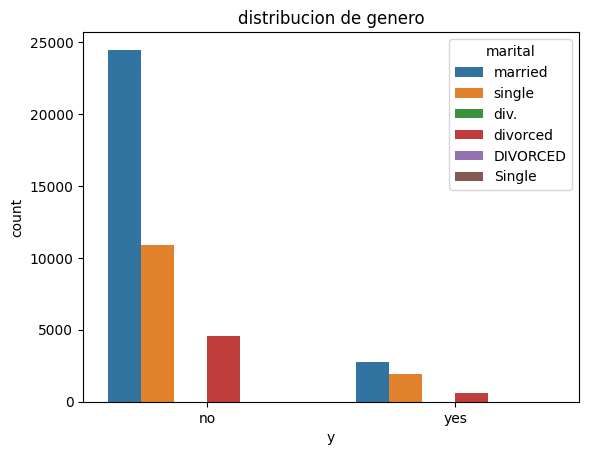

In [81]:
#3-En un gráfico de barras, establece la distribución de estado entre clientes interesados en el certificado de depósito.
import seaborn as sns

sns.countplot(x='y',hue='marital', data=data)
plt.title('distribucion de genero')
plt.show()


Nivel educativo clientes interesados
secondary    2451
tertiary     1996
primary       590
unknown       252
Primary         1
Name: education, dtype: int64
2451


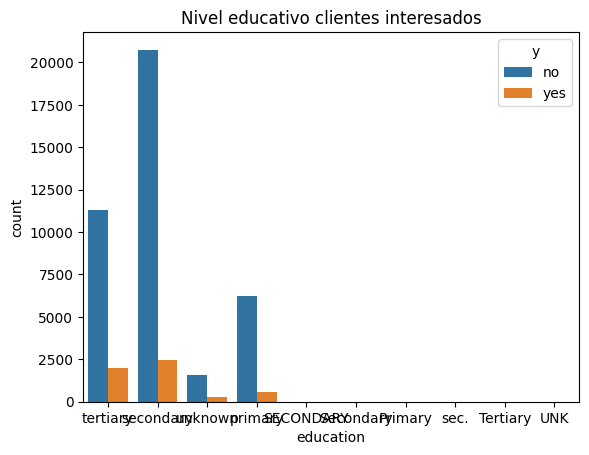

In [83]:
#4 Nivel educativo predominante entre clientes interesados en el certificado
Niv_Educ = (data[data['y'] == 'yes'].education.value_counts())
NE = max(Niv_Educ)
print("Nivel educativo clientes interesados")
print(Niv_Educ)
print(NE)

sns.countplot(x='education', hue='y',data=data)
plt.title('Nivel educativo clientes interesados')
plt.show()

In [84]:
#proporcion de clientes con hipotecas pendientes
proporcion_clientes = data[(data['housing'] == 'yes') & (data['y'] == 'yes')].shape[0]/data[data['housing']=='yes'].shape[0]
print("proporcion clientes con hipoteca interesados:", proporcion_clientes)

proporcion clientes con hipoteca interesados: 0.07703326436415725


relacion entre estrado civil Vs interes en adquirir el certificado
married     2755
single      1912
divorced     623
Name: marital, dtype: int64
2755


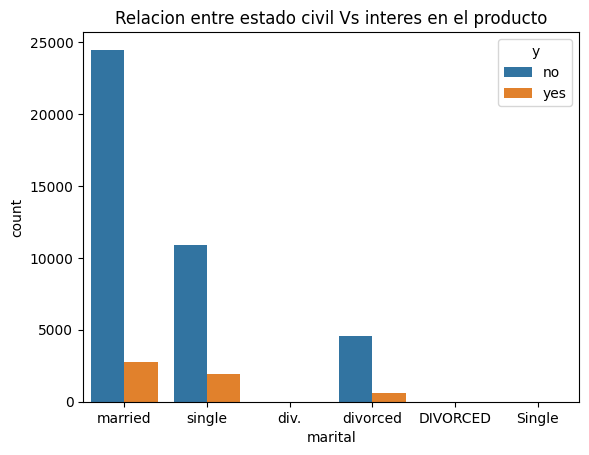

In [85]:
#5 Cual es la relacion entre estado civil Vs el interes en adquirir el certificado
Est_civil = (data[data['y'] == 'yes'].marital.value_counts())
EST_ci = max(Est_civil)
print("relacion entre estrado civil Vs interes en adquirir el certificado")
print(Est_civil)
print(EST_ci)

sns.countplot(x='marital', hue='y',data=data)
plt.title('Relacion entre estado civil Vs interes en el producto')
plt.show()


medio de contacto mas frecuente entre los clientes interesados
cellular     4370
unknown       530
telephone     389
phone           1
Name: contact, dtype: int64
4370


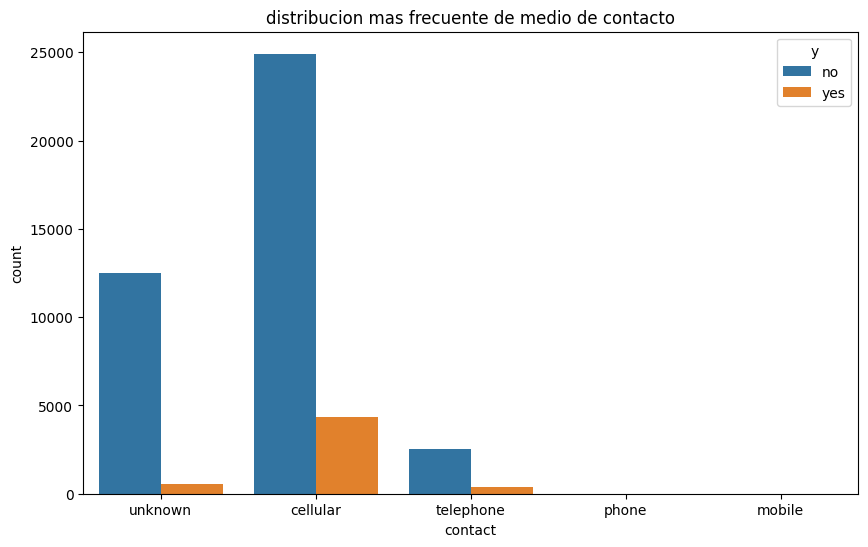

In [86]:
#6 Cual es la distribucion mas frecuente de medio de contacto entre los clientes interesados?
cli_contc = (data[data['y'] == 'yes'].contact.value_counts())
contc = max(cli_contc)
print("medio de contacto mas frecuente entre los clientes interesados")
print(cli_contc)
print(contc)

plt.figure(figsize=(10,6))
sns.countplot(x='contact', hue='y',data=data)
plt.title('distribucion mas frecuente de medio de contacto')
plt.show()



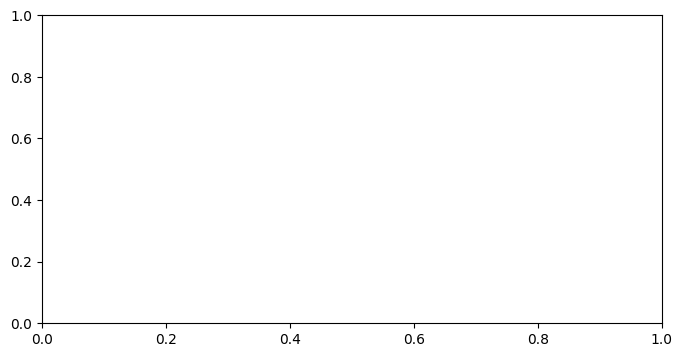

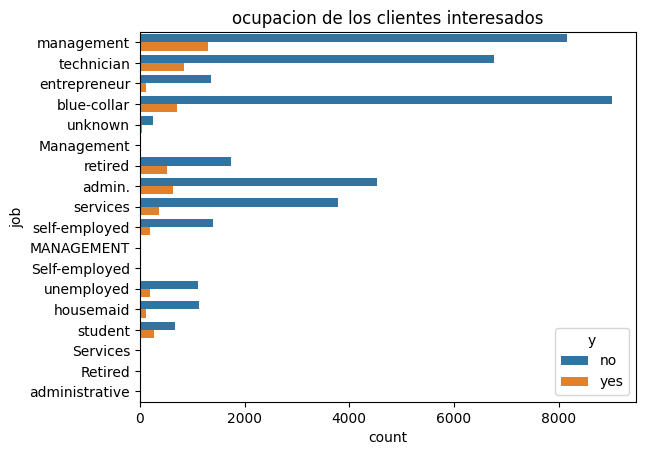

In [82]:
#7 En un grafico de barras horizontales responda, cual es la ocupacion de los interesados
clientes_no_interesados = data.drop(data[data['y'] == 'No'].index)

print('\n')
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,4))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(data[data['y'] == 'Yes'].job.value_counts()):

 sns.countplot(y='job', hue='job', data=clientes_no_interesados, palette = 'pastel', legend=False, width=0.5, order = clientes_no_interesados['job'].value_counts().index)
 plt.title("Ocupacion clientes interesados", fontsize=14, color="Navy")
 plt.xlabel('Interesados', fontsize=12, color="Navy")
 plt.ylabel('Job', fontsize=12, color="Navy")
 plt.setp(ax.get_xticklabels(), ha="right", color="midnigthblue", fontsize=8)
 plt.setp(ax.get_yticklabels(), ha="right", color="midnigthblue", fontsize=8)

plt.show()

sns.countplot(y='job',hue='y',data=data)
plt.title('ocupacion de los clientes interesados')
plt.show()





In [77]:
jobs = (data[data['y'] == 'Yes'].job.value_counts())
mj = max(jobs)
print(jobs)
print('Valor max', mj)

ValueError: max() arg is an empty sequence

frecuencia de contacto clientes interesados
nan


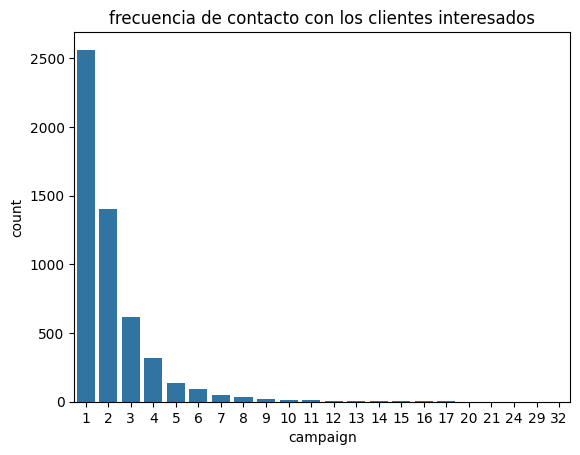

In [95]:
#8 cual es la frecuencia de contacto con los clientes interesados antes de la conversacion

Fre_contc = data[data['y'] == 'Yes'].previous.mean()
print("frecuencia de contacto clientes interesados")
print(Fre_contc)

sns.countplot(x='campaign', data=data[data['y'] == 'yes'])
plt.title('frecuencia de contacto con los clientes interesados')
plt.show()



patron temporal en los contactos que conducen a una mayor conversionde clientes
may    925
aug    688
jul    627
apr    577
jun    547
feb    441
nov    403
oct    323
sep    269
mar    248
jan    142
dec    100
Name: month, dtype: int64
valor maximo 925


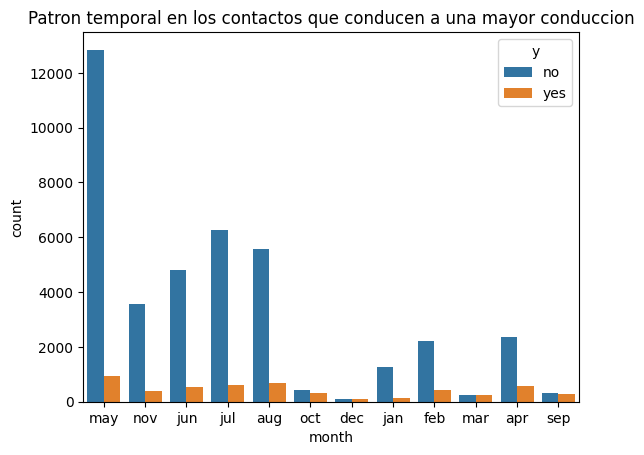

In [97]:
#9 cual es el patron temporal enlos ocntactos que conducen a una mayor conversion de clientes?
patron_temporal = (data[data['y'] == 'yes'].month.value_counts())
pt = max(patron_temporal)
print("patron temporal en los contactos que conducen a una mayor conversionde clientes")
print(patron_temporal)
print('valor maximo', pt)

sns.countplot(x='month', hue='y', data=data)
plt.title('Patron temporal en los contactos que conducen a una mayor conduccion')
plt.show()



<ipython-input-98-06a6c16391d9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('marital').mean().plot.bar()


<Axes: xlabel='marital'>

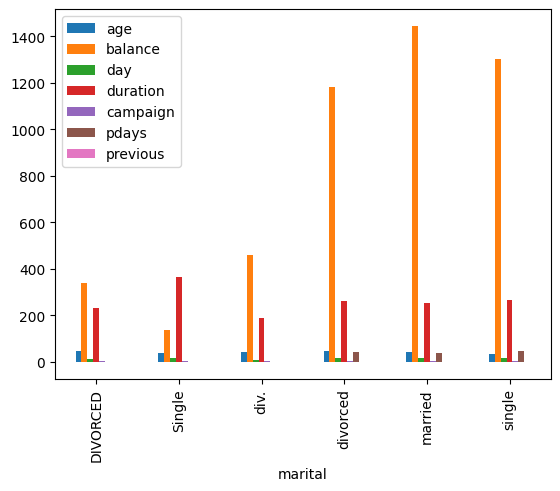

In [98]:
data.groupby('marital').mean().plot.bar()